In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data Loading
df = pd.read_csv('titanic.csv')
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C


In [8]:
#check the shape of the data
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values in 'Age', 'Cabin' and 'Embarked' columns

In [ ]:
# handaling the null value


## **Question:** How many people survived in titanic crash?

In [12]:
print("Total survived: ",df[df['Survived']==1]['Survived'].count())
print("Total dead: ",df[df['Survived']==0]['Survived'].count())

Total survived:  342
Total dead:  549


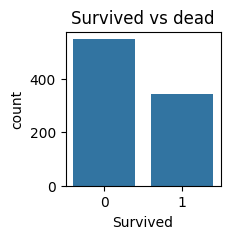

In [51]:
# plot (cat-num) type
plt.figure(figsize=(2,2))
sns.countplot(x='Survived',data=df)
plt.title("Survived vs dead")
plt.show()

In [21]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [31]:
surv=df['Survived'].value_counts()
survived_percent = round((surv[1]/df['Survived'].count())*100,2)
dead_percent = round((surv[0]/df['Survived'].count())*100,2)
print(f"{survived_percent}% people survived and {dead_percent}% people dead")

38.38% people survived and 61.62% people dead


**Observation:** 38.38% passanger survived and 61.62% people died

In [37]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**Observation:** survival ratio of female is greater than male

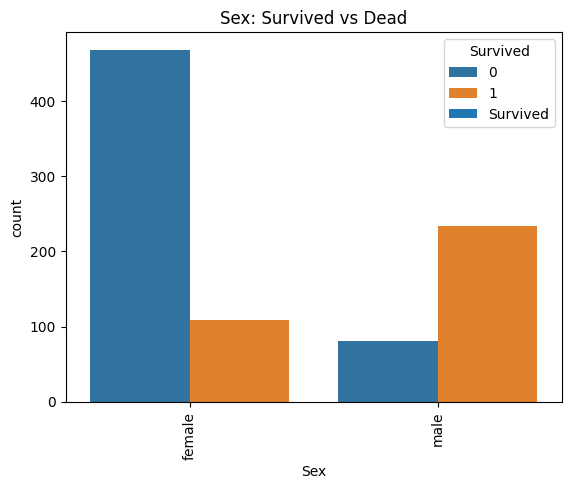

In [50]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Sex: Survived vs Dead")
plt.show()

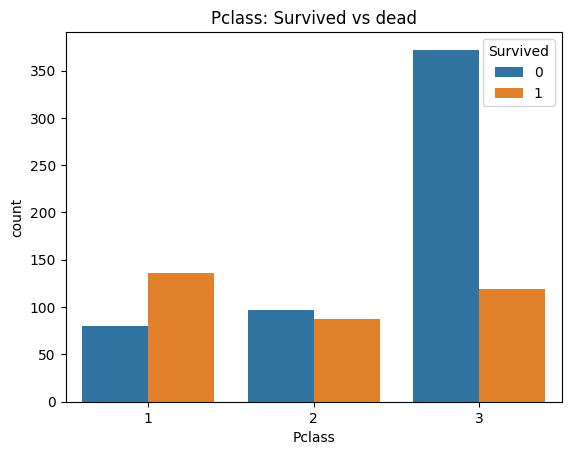

In [48]:
# Class: Survived vs Dead
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Pclass: Survived vs dead')
plt.show()

**Observation:** It is clear that passangers of class 1 are given high prority while resque. Although the number is high in class 3 but only approx 30% survived. But in class 2 has almost 50:50 survived vs dead, class 1 has almost 65:35 survived:dead. Class matters while travelling :)

In [52]:
pd.crosstab([df.Sex, df.Survived], df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

The above plot show the further distribution of Class wise and Sex wise survival distribution

In [53]:
sns.factorplot('Pclass','Survived',hue='Sex', data=df)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'